In [1]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Download S&P 500 historical data
data = yf.download('BTC-USD', start='2023-01-01', progress=False)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [4]:
# convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [5]:
time[:10]

[738521,
 738522,
 738523,
 738524,
 738525,
 738526,
 738527,
 738528,
 738529,
 738530]

In [6]:
# create list of observation data
price = np.log(data['Close'].values)

In [7]:
price[:10]

array([9.71866768, 9.72247338, 9.72195713, 9.73289128, 9.73131846,
       9.73813926, 9.73832266, 9.74631574, 9.75246433, 9.76688247])

In [8]:
price[-10:]

array([11.0386995 , 11.03701593, 11.01175477, 11.00666441, 11.04204289,
       11.05394919, 11.04852809, 11.09810864, 11.11306128, 11.12119914])

In [9]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [10]:
observations.shape

(2, 655)

In [11]:
# for _ in range(5):
#     lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
#     tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4)
#     print(pd.Timestamp.fromordinal(int(tc)))

In [27]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=100000, pop_size=4, factor_sigma=0.02)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=296096, Thu Oct 17 10:36:20 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 8.278538891793921e-01 1.0e+00 9.40e-01  2e-02  1e+04 0:00.0
    2    320 8.277536702822752e-01 1.5e+00 9.47e-01  1e-02  1e+04 0:00.1
    3    480 8.277305733028022e-01 1.4e+00 1.15e+00  2e-02  1e+04 0:00.1
   60   9600 7.836235314386509e-01 4.6e+02 9.50e+01  9e-05  2e-01 0:03.2
   72  11520 7.836235310595576e-01 5.8e+02 6.25e+01  2e-07  4e-04 0:03.9
2025-06-22 00:00:00


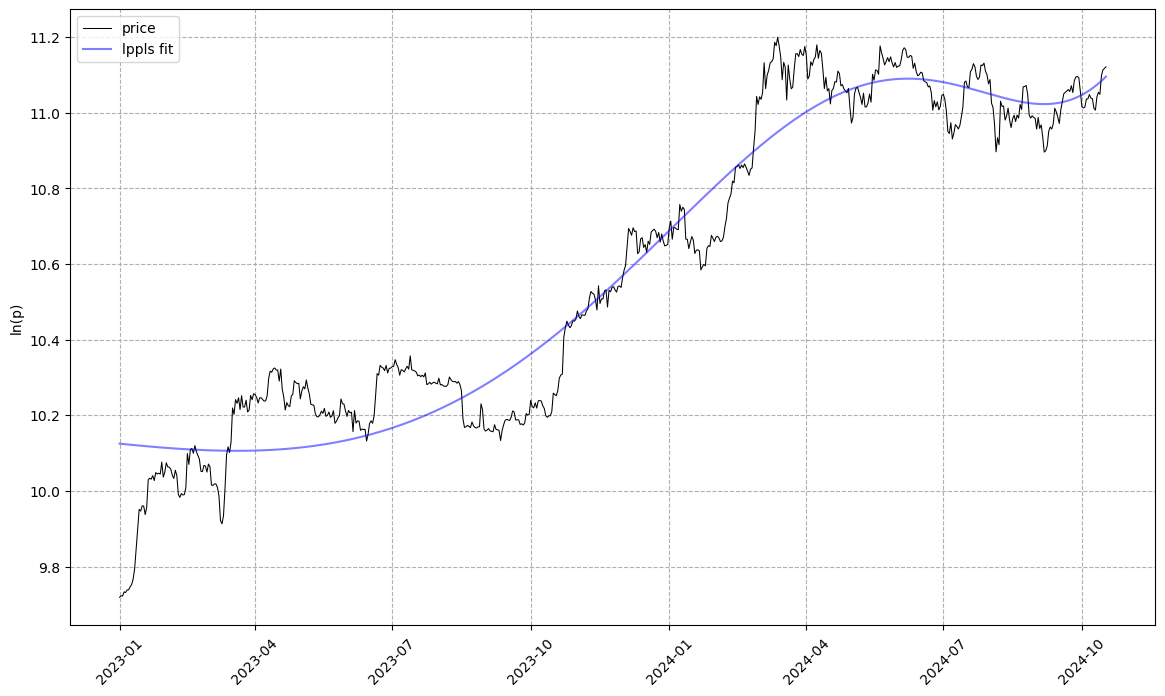

In [28]:
# visualize the fit
lppls_model.plot_fit()

In [14]:
# # compute the confidence indicator
# res = lppls_model.mp_compute_nested_fits(
#     workers=8,
#     window_size=120, 
#     smallest_window_size=30, 
#     outer_increment=1, 
#     inner_increment=5, 
#     max_searches=25,
#     # filter_conditions_config={} # not implemented in 0.6.x
# )

In [15]:
# lppls_model.plot_confidence_indicators(res)